# Exploratory Data Analysis 
### Dr. Martin Luther King's (1963) "I Have a Dream" speech


In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from PIL import Image # used for opening image for masking wordcloud # you need to install Pillow package

import nltk
nltk.download('punkt') # sentance tokenizer
nltk.download('stopwords')
nltk.download('wordnet') # WordNet is a lexical database for the English language - used to find the lemma of a word

nltk.download('vader_lexicon') # Valence Aware Dictionary and sEntiment Reasoner
from nltk.sentiment.vader import SentimentIntensityAnalyzer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Clean/preprocess text

In [61]:
import chardet

# Open the file
with open("./data/MLK_speech_PA1.txt", "rb") as f:
    # Read the first 100 bytes
    rawdata = f.read(100)
    
# Detect the encoding
result = chardet.detect(rawdata)

# Print the result
print(result)
    

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [62]:
with open('data/MLK_speech_PA1.txt','r', encoding = 'utf-16') as f: #read data and store in text(local)
    text = f.read()
tokens = nltk.word_tokenize(text) # tokenize 
tokens = [word for word in tokens if word.isalpha()] # removing if word not an alphabet
tokens = [word.lower() for word in tokens ] #lower case each word
tokens = [word for word in tokens if len(word)>1] # select words where length greater than 1 since they dont effect the sentiment
stop_words = stopwords.words('english') # def stop words 
tokens = [word for word in tokens if word not in stop_words] # remove stop words
lemmatizer = nltk.WordNetLemmatizer() # lemmatize each word
tokens = [lemmatizer.lemmatize(word) for word in tokens]
print(tokens[:15])

['happy', 'join', 'today', 'go', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation', 'five', 'score', 'year', 'ago', 'great']


### Data Visualizations

(20, 15, 13, 13, 12, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6)
('freedom', 'negro', 'one', 'let', 'ring', 'nation', 'dream', 'day', 'every', 'come', 'today', 'go', 'back', 'satisfied', 'must', 'justice', 'able', 'white', 'together', 'men')


Text(0.5, 1.0, 'Barplot of Top 20 Most Frequent Words')

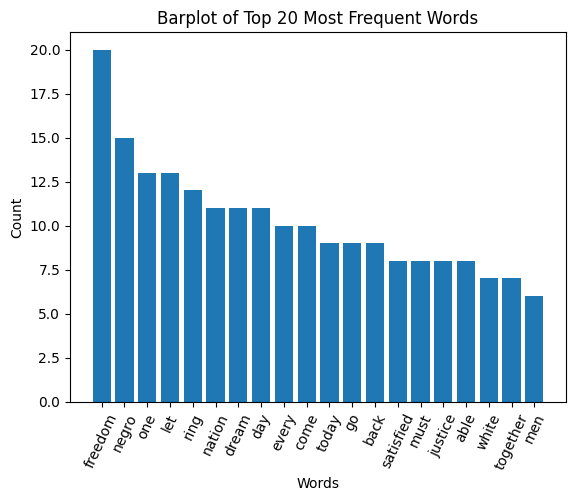

In [63]:
# We want to draw a barplot of the most frequent words in this speech
# to do this, we must create a dictionary with word counts for each word, and sort the dictionary by word counts
token_freq = {}                              # creat an empty dictionary
for token in tokens:                         # for each word in the list of words
    token_freq[token] = token_freq.get(token, 0) + 1  # add 1 to the count value for the key word in the dictionary (rememeber, a dictionary is a key-value pair)

# in the above code, we use get(). It returns the value of a key (word) in a dictionary if it exists. If it doesn't exist
# it returns the value of the second arguement (0 in this case). This is a compact way of counting the frequency of words.

# Since dictionaries are unordered, to sort the word counts from high 
# to low, we must convert the dictionary into a list (of tuples)
word_freq = []                      # create an empty list
for key, value in token_freq.items():     # iterate through the key value pairs in the dictionary
    word_freq.append((value, key))  # append a tuple of (value, key) to word_freq list.
# items() returns a list of tuples with key-value pairs in a dictionary
# Keys and values are reversed in list word_freq for ease of sorting 

# Sort word_freq list from high to low
word_freq.sort(reverse=True)

top20_words = word_freq[0:20]   # slice the first 20 words

# Convert the list of tuples to two tuples for plotting using zip()
values, labels = zip(*top20_words) # unzip the list of tuples into two tuples
print(values)
print(labels)

# Barplot of most frequent words
import matplotlib.pyplot as plt
plt.bar(labels, values)
plt.xlabel('Words')
plt.xticks(rotation=65)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Most Frequent Words')

### Sentiment Analysis

In [75]:
analyzer = SentimentIntensityAnalyzer()

print(analyzer.polarity_scores(text))

# neg: Negative
# neu: Neutral
# pos: Positive
# compound: Compound (i.e. aggregated score)
# Compound value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment)

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [76]:
print(analyzer.polarity_scores(text))

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [77]:
for w in tokens[:20]:
    print(w, analyzer.polarity_scores(w))

happy {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
join {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
today {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
greatest {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
demonstration {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1027}
freedom {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
five {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
score {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
year {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ago {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
great {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
american {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
whose {'ne

In [78]:
negative_words = 0
positive_words = 0

for w in tokens:
    polarity = analyzer.polarity_scores(w)
    if polarity['compound']>=0.2:
        positive_words += 1 
    elif polarity["compound"] <=-0.2:
        negative_words += 1

total_words = len(tokens)
neutral_words = total_words - positive_words - negative_words

print(f"Neutral words: {neutral_words} / {neutral_words/total_words*100:0.2f}%")
print(f"Positive words: {positive_words} / {positive_words/total_words*100:0.2f}%")
print(f"Negative words: {negative_words} / {negative_words/total_words*100:0.2f}%")


Neutral words: 656 / 80.29%
Positive words: 124 / 15.18%
Negative words: 37 / 4.53%


In [79]:
# create a dataframe with tokens column
df = pd.DataFrame({'tokens':tokens})

# add a column with the sentiment score for each token
df['sentiment'] = df['tokens'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# plot the sentiment score for each token with negative sentiment in red and positive sentiment in green
df['color'] = df['sentiment'].apply(lambda x: 'red' if x <= -0.2 else ('green' if x >=0.2 else 'blue'))

df.head()

,tokens,sentiment,color
0,happy,0.5719,green
1,join,0.2960,green
2,today,0.0000,blue
3,go,0.0000,blue
4,history,0.0000,blue


Number of positive tokens:  124
Number of negative tokens:  37
Number of neutral tokens:  656


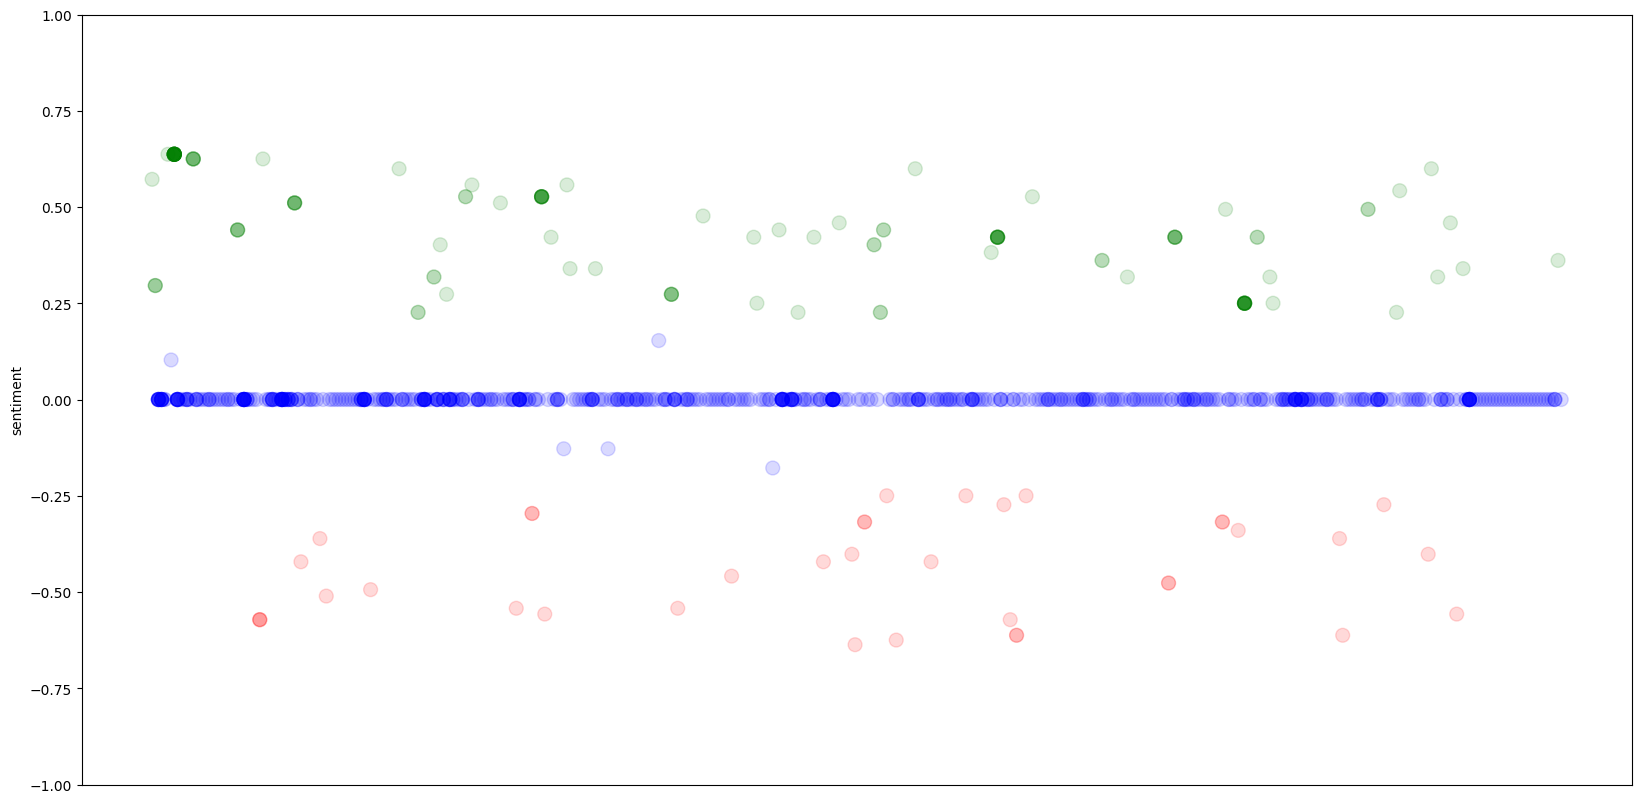

In [80]:
ax = df.plot.scatter(x='tokens',y='sentiment',figsize=(20,10),s=100,c=df['color'], alpha=0.15)

ax.set_ylim(-1,1)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)

# set the x-axis label
plt.xlabel('',fontsize=20)

num_of_positve_tokens = len(df[df['sentiment'] >= 0.2])
num_of_negative_tokens = len(df[df['sentiment'] <= -0.2])
num_of_neutral_tokens = neutral_words

print("Number of positive tokens: ", num_of_positve_tokens)
print("Number of negative tokens: ", num_of_negative_tokens)
print("Number of neutral tokens: ", num_of_neutral_tokens)

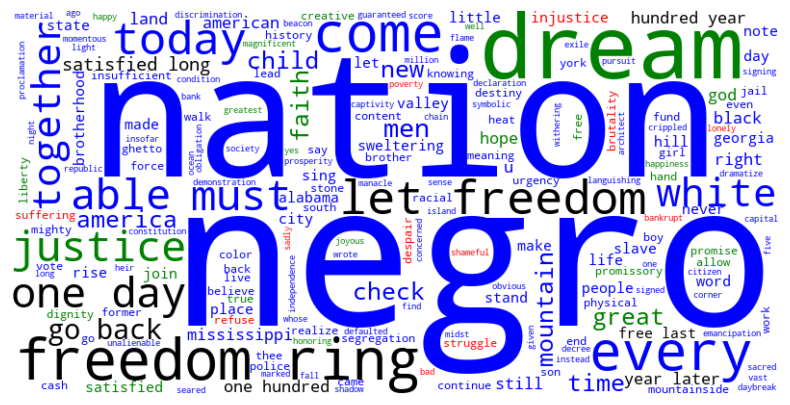

In [81]:
# Color mapping for sentiments

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_mapping.get(word, 'black')

wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    color_func=color_func
).generate(" ".join(tokens))  # Join the tokens into a single string

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
